In [1]:
from google.colab import drive
drive.mount("/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /gdrive


In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression as LR

In [3]:
region = ['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', 
          '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']

print(len(region))

25


### subway

In [5]:
data1 = pd.read_csv("/gdrive/My Drive/문화관광공모전/데이터_처리/subway.csv", encoding='utf-8', na_values=' ')
data1 = data1.fillna(0) # NaN 값 채우기
data1

,Unnamed: 0,기간,자치구,승하차 평균
0,0,2011년01월,강남구,9686.9
1,1,2011년02월,강남구,9022.7
2,2,2011년03월,강남구,10448.3
3,3,2011년04월,강남구,10207.6
4,4,2011년05월,강남구,9677.4
5,5,2011년06월,강남구,9981.6
6,6,2011년07월,강남구,9814.0
7,7,2011년08월,강남구,9461.1
8,8,2011년09월,강남구,9454.6
9,9,2011년10월,강남구,9626.1


In [0]:
time1 = np.arange(0, 96).reshape(-1, 1) # X 축 만들어주기 (8년치 * 12개월)
time1.shape

(96, 1)

(96, 1)

In [0]:
tmp = data1[data1['자치구'] == '강남구'] # 지역별 분리
avg = tmp['승하차 평균'] # 정리할 값들 (Y 축)
avg.shape

(96,)

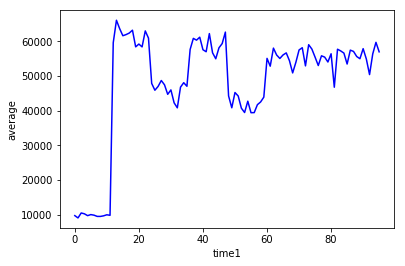

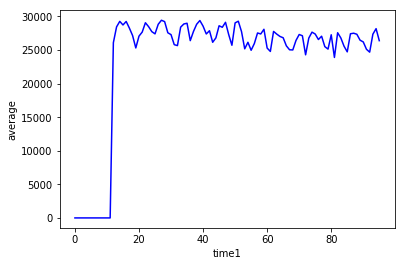

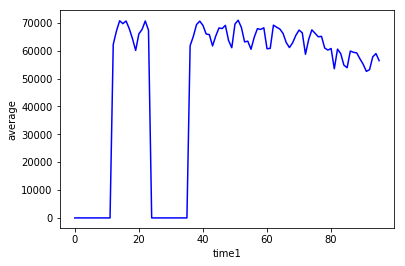

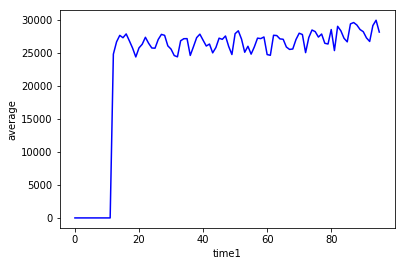

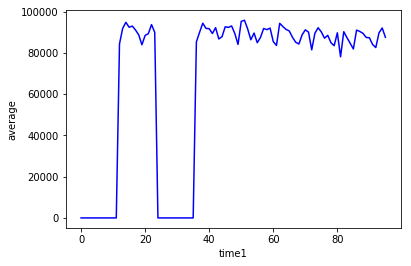

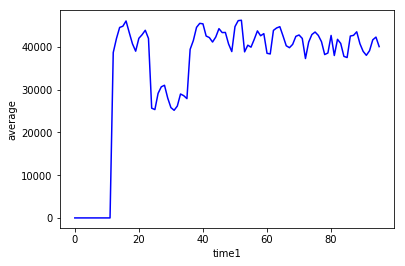

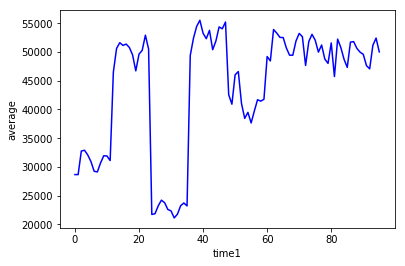

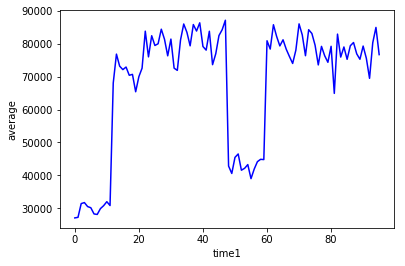

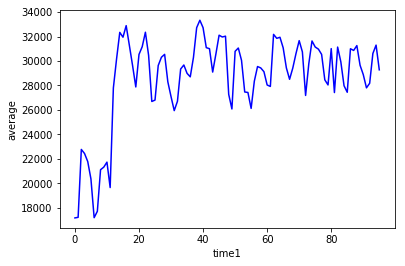

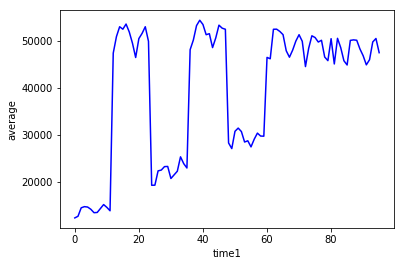

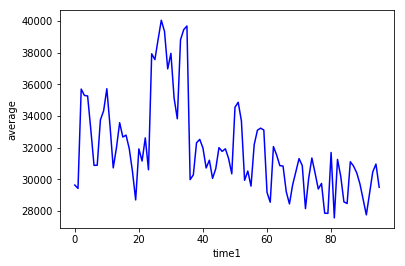

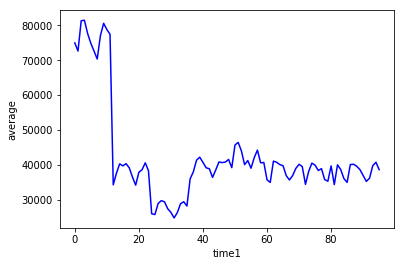

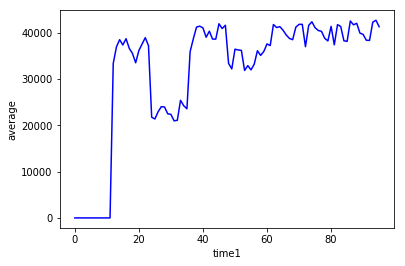

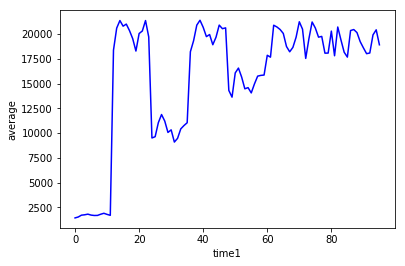

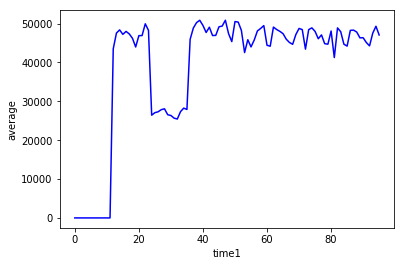

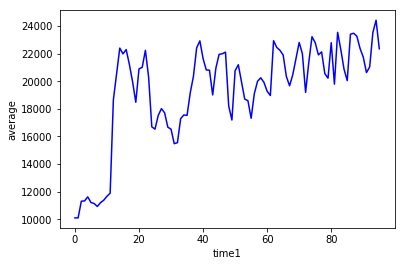

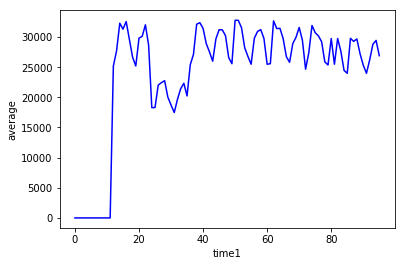

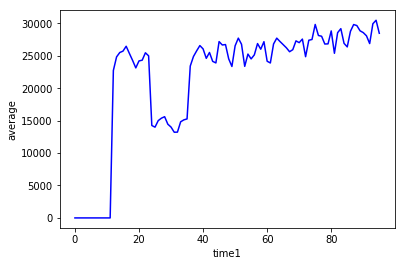

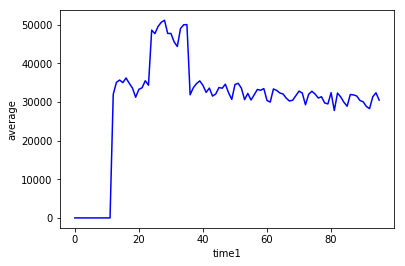

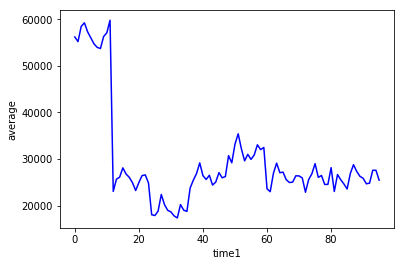

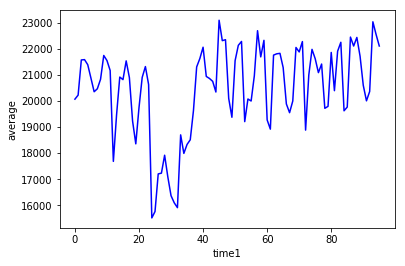

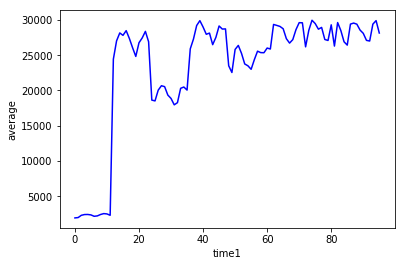

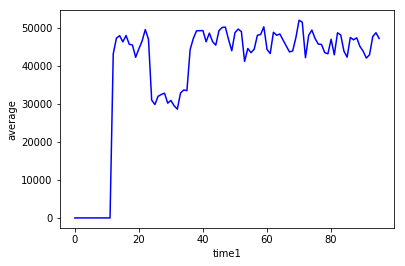

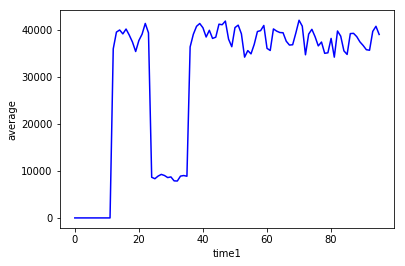

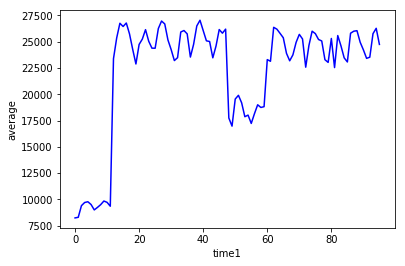

In [0]:
time1 = np.arange(0, 96).reshape(-1, 1) # X 축 만들어주기 (8년치 * 12개월)
rate1 = []

for i in range(len(region)): # 지역구 별로 돌면서 처리
    lr = LR() # Linear Regression 사용
    
    plt.figure()
    
    tmp = data1[data1['자치구'] == region[i]] # 지역별 분리
    avg = tmp['승하차 평균'] # 정리할 값들 (Y 축)
    avg.fillna(0) # NaN 값 처리
    
    plt.plot(time1, avg, 'b') # 그래프 그리기
    lr = lr.fit(time1, avg) # linear 시키기
    rate1.append(lr.coef_[0]) # 기울기 값들 정리
    
    plt.xlabel('time1')
    plt.ylabel('average')
    
    plt.show()

In [0]:
rate1 # 지하철 승하차 평균

[294.2178520075963,
 167.40435227889313,
 549.9435770482909,
 199.76197843190457,
 841.459346174715,
 308.7801458220293,
 203.95331389039612,
 313.951457542051,
 64.43619641888226,
 280.15508749321754,
 -54.47244302767227,
 -230.03917661421607,
 339.81833016820394,
 138.47981890938686,
 373.52378594682574,
 91.77436991318503,
 206.77941535539884,
 245.53640328269134,
 142.18909997287028,
 -180.2685146500271,
 20.410070537167666,
 207.32338714053176,
 356.3160906131308,
 338.932925257732,
 94.38791372761801]

### Business Rate

In [0]:
data2 = pd.read_csv("/gdrive/My Drive/문화관광공모전/데이터_처리/seoul_business (1).csv", encoding='utf-8', na_values=' ')
data2 = data2.fillna(0)
data2

,Unnamed: 0,기간,자치구,사업체수,사업체 창업률
0,0,2011.0,종로구,38635.0,11.59
1,1,2012.0,종로구,39486.0,10.50
2,2,2013.0,종로구,39326.0,11.29
3,3,2014.0,종로구,40923.0,11.41
4,4,2015.0,종로구,40871.0,11.65
5,5,2016.0,종로구,40664.0,10.94
6,6,2017.0,종로구,40490.0,8.93
7,7,2011.0,동대문구,30130.0,11.97
8,8,2012.0,동대문구,31881.0,10.00
9,9,2013.0,동대문구,31972.0,12.49


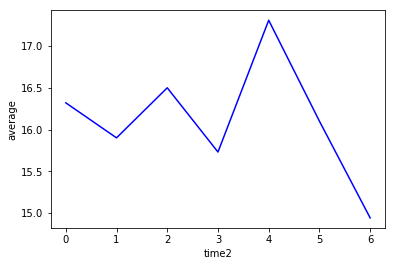

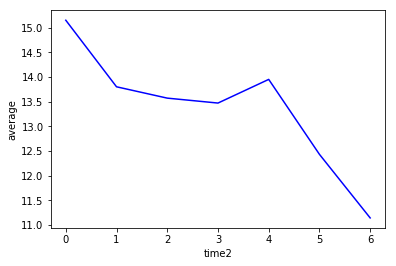

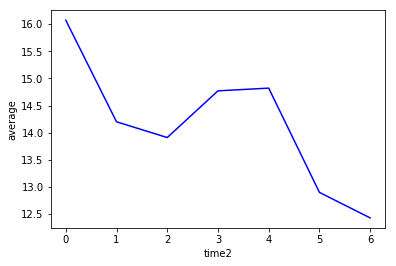

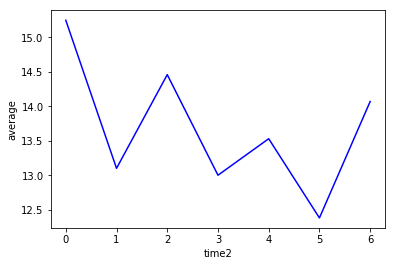

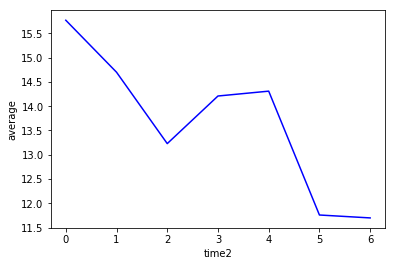

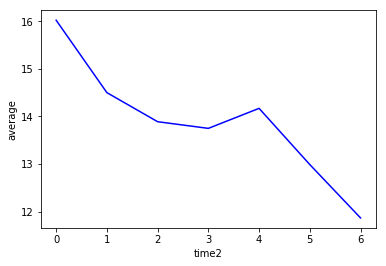

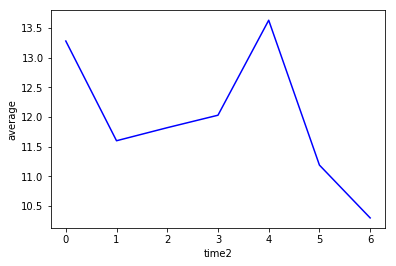

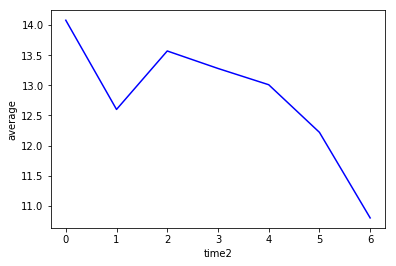

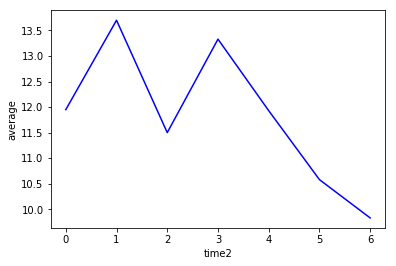

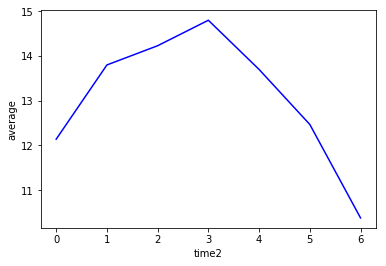

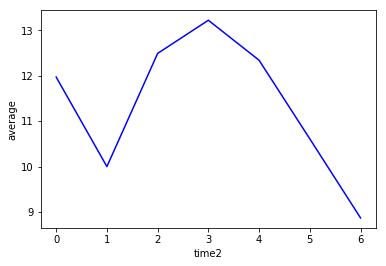

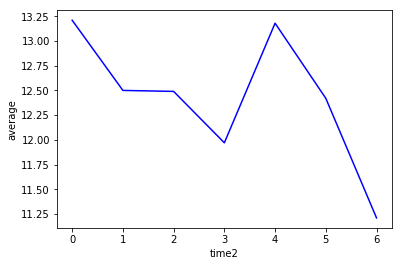

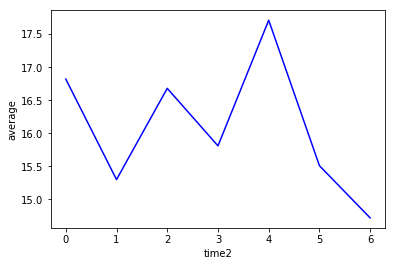

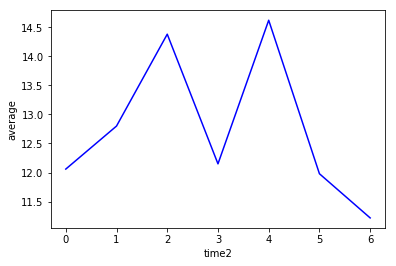

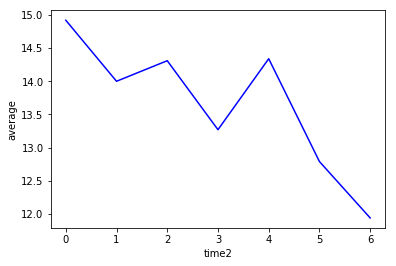

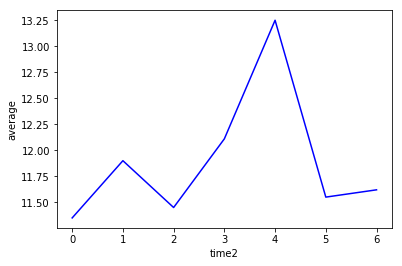

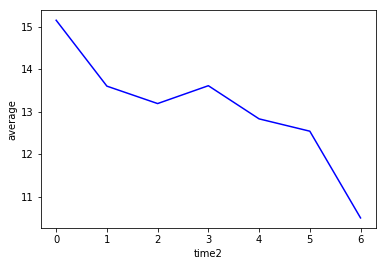

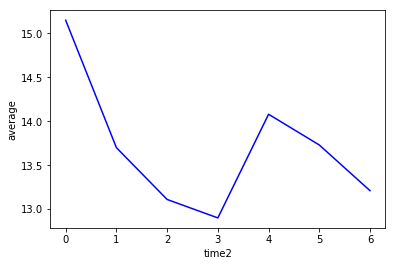

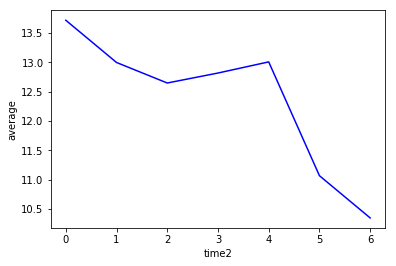

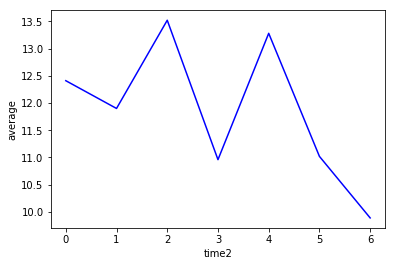

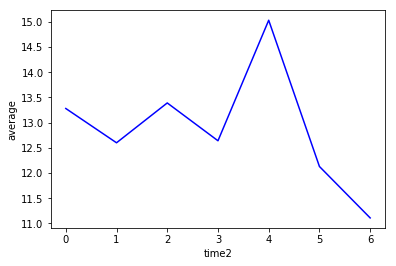

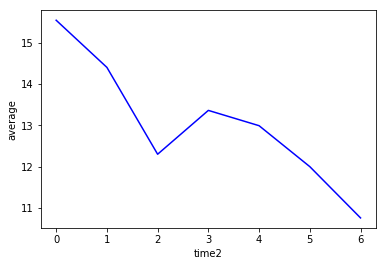

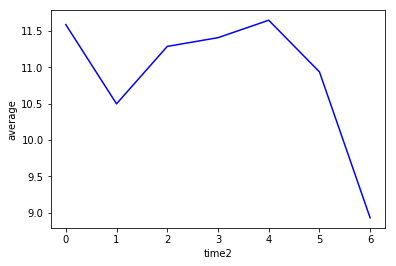

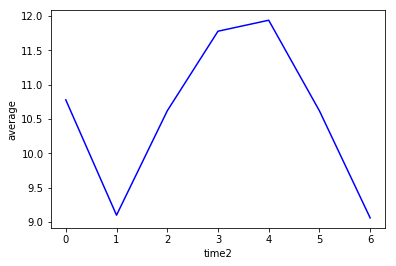

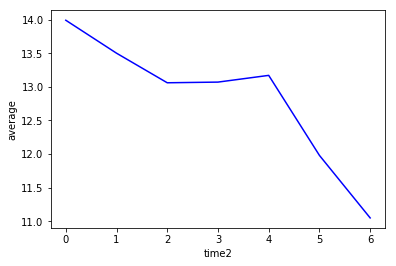

In [0]:
time2 = np.arange(0, 7).reshape(-1, 1)
rate2 = []

for i in range(len(region)):
    lr = LR()
    
    plt.figure()
    
    tmp = data2[data2['자치구'] == region[i]]
    avg = tmp['사업체 창업률']
    avg.fillna(0)
    
    plt.plot(time2, avg, 'b')
    lr = lr.fit(time2, avg)
    rate2.append(lr.coef_[0])
    
    plt.xlabel('time2')
    plt.ylabel('average')
    
    plt.show()

In [0]:
rate2 # 사업체 창업률

[-0.10464285714285716,
 -0.5139285714285715,
 -0.4503571428571428,
 -0.21107142857142852,
 -0.6075000000000002,
 -0.5425,
 -0.28392857142857125,
 -0.39857142857142835,
 -0.4346428571428569,
 -0.3025,
 -0.2939285714285716,
 -0.1953571428571428,
 -0.17321428571428565,
 -0.14,
 -0.4046428571428572,
 0.06821428571428571,
 -0.5867857142857142,
 -0.1710714285714284,
 -0.48607142857142865,
 -0.34142857142857136,
 -0.20749999999999993,
 -0.6589285714285713,
 -0.2407142857142857,
 -0.02857142857142847,
 -0.419642857142857]

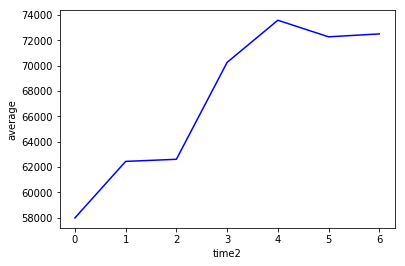

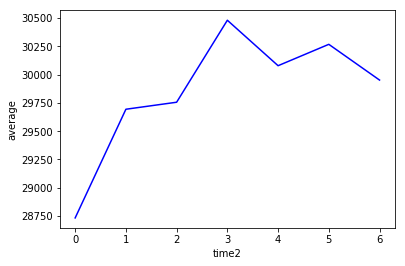

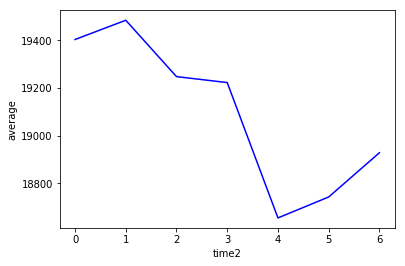

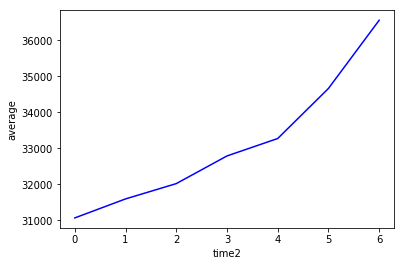

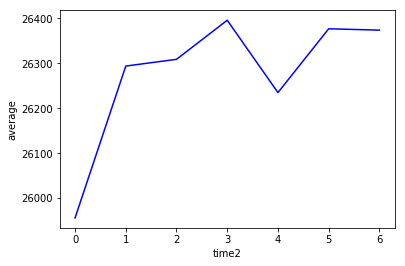

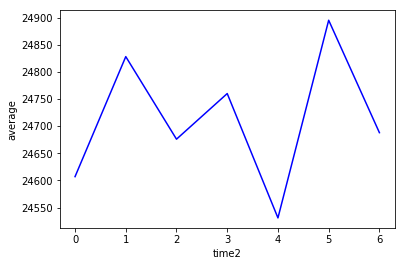

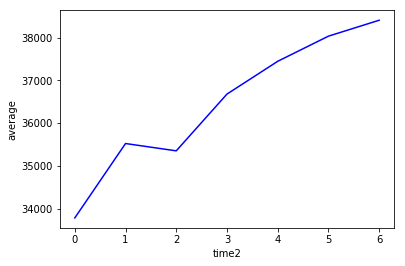

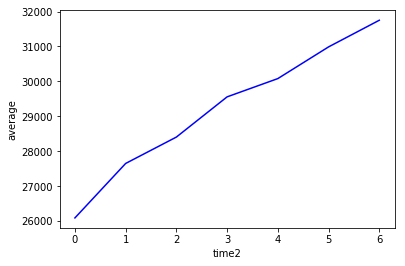

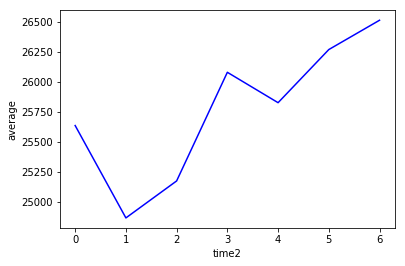

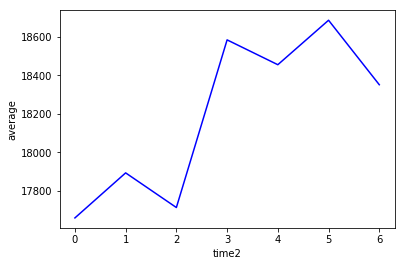

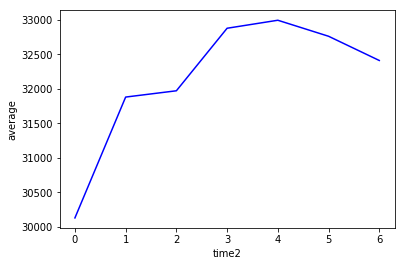

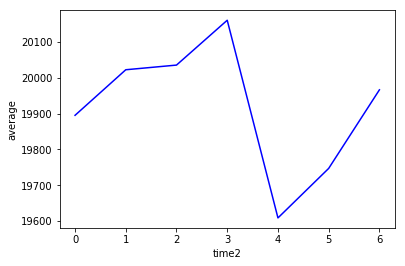

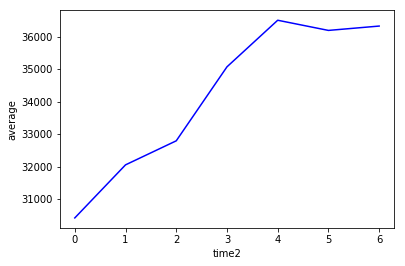

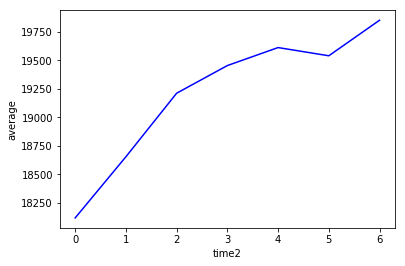

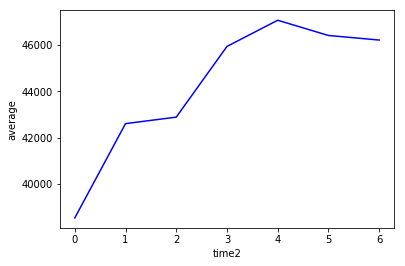

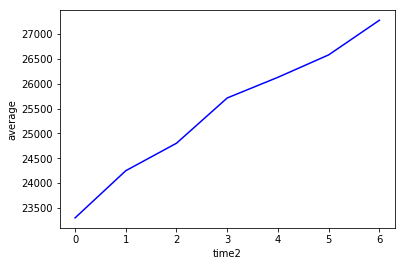

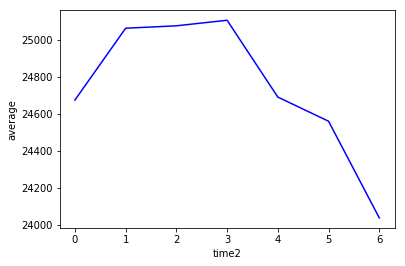

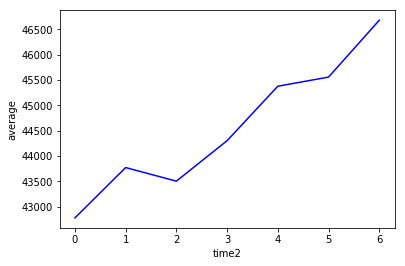

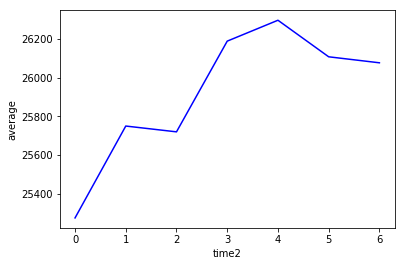

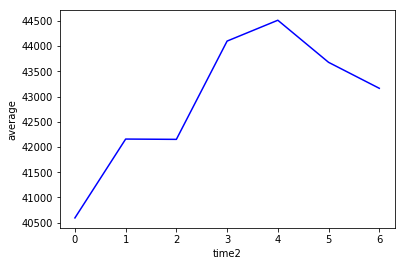

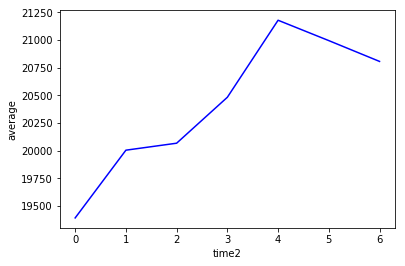

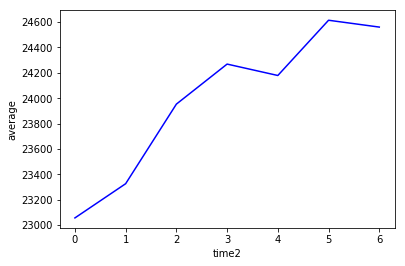

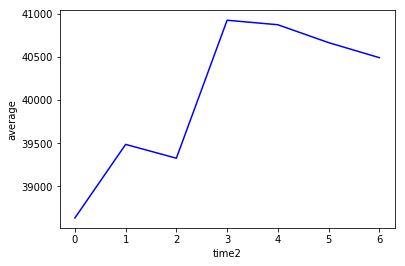

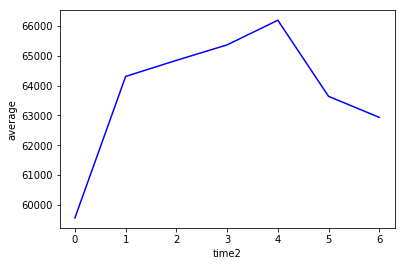

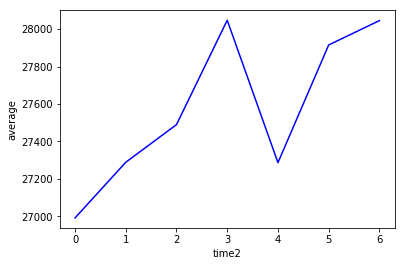

In [0]:
time4 = np.arange(0, 7).reshape(-1, 1)
rate4 = []

for i in range(len(region)):
    lr = LR()
    
    plt.figure()
    
    tmp = data2[data2['자치구'] == region[i]]
    avg = tmp['사업체수']
    avg.fillna(0)
    
    plt.plot(time4, avg, 'b')
    lr = lr.fit(time4, avg)
    rate4.append(lr.coef_[0])
    
    plt.xlabel('time2')
    plt.ylabel('average')
    
    plt.show()

In [0]:
rate4 # 사업체 수

[2650.5,
 183.14285714285714,
 -125.28571428571429,
 851.6071428571428,
 48.07142857142858,
 8.285714285714285,
 749.142857142857,
 904.2857142857141,
 218.14285714285708,
 157.28571428571425,
 343.8214285714285,
 -27.249999999999993,
 1060.7857142857142,
 263.67857142857133,
 1242.8214285714284,
 640.1071428571427,
 -117.53571428571428,
 611.9285714285712,
 132.10714285714286,
 468.2142857142856,
 261.89285714285705,
 261.57142857142856,
 338.07142857142844,
 361.3214285714284,
 150.28571428571422]

### Total Production

In [0]:
data3 = pd.read_csv("/gdrive/My Drive/문화관광공모전/데이터_처리/seoul_total_production.csv", encoding='euc-kr', na_values=' ')
data3 = data3.fillna(0)
data3

,Unnamed: 0,기간,자치구,지역내총생산(당해년가격),구성비
0,0,2010.0,종로구,23758373.0,8.2
1,1,2011.0,종로구,24988465.0,8.2
2,2,2012.0,종로구,25061092.0,8.0
3,3,2013.0,종로구,25106001.0,7.9
4,4,2014.0,종로구,26759739.0,8.1
5,5,2015.0,종로구,27929070.0,8.1
6,6,2016.0,종로구,28036775.0,7.8
7,7,2010.0,중구,44161229.0,15.2
8,8,2011.0,중구,45664447.0,15.0
9,9,2012.0,중구,46050828.0,14.7


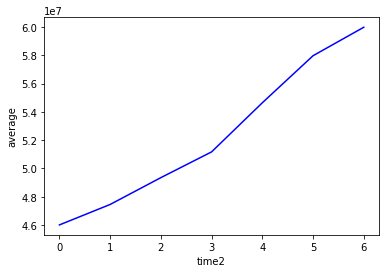

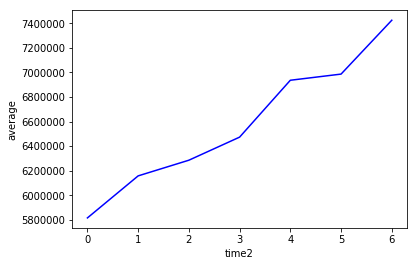

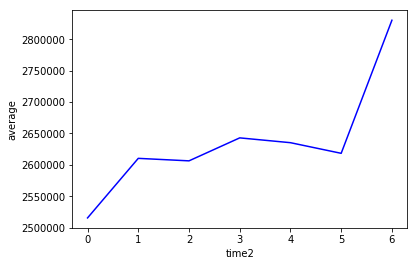

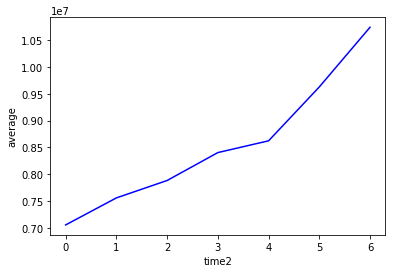

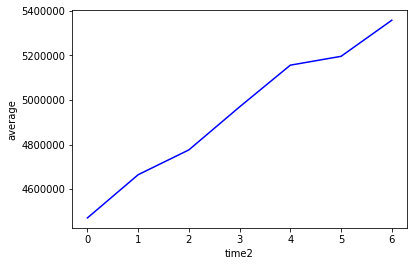

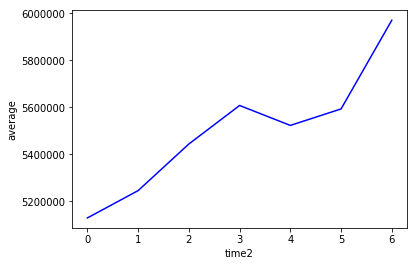

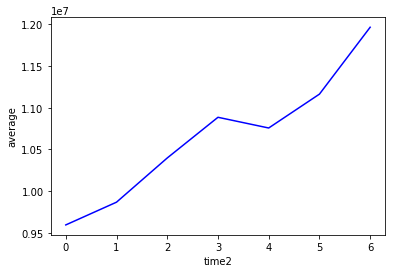

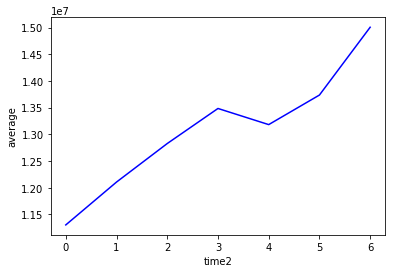

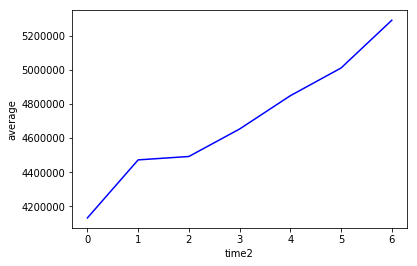

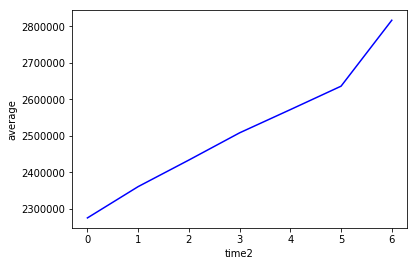

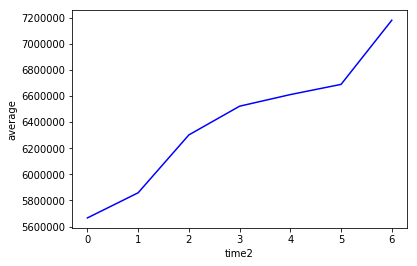

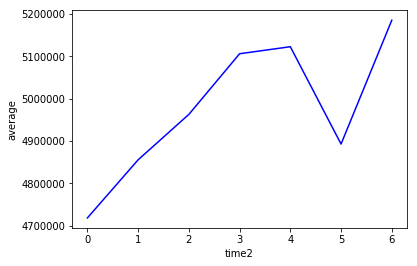

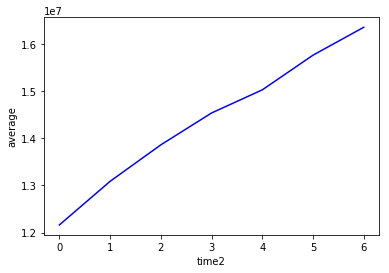

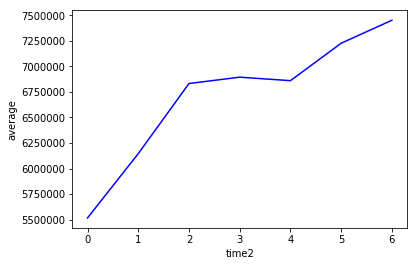

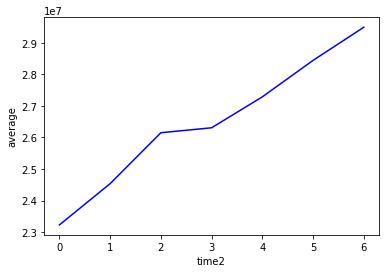

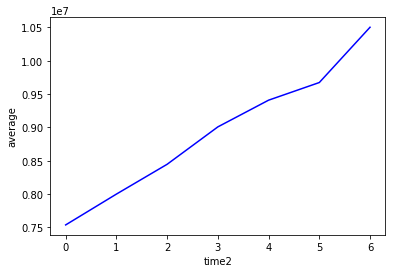

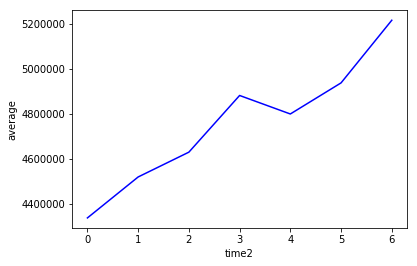

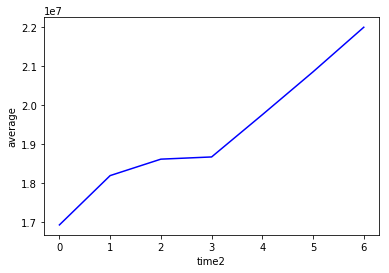

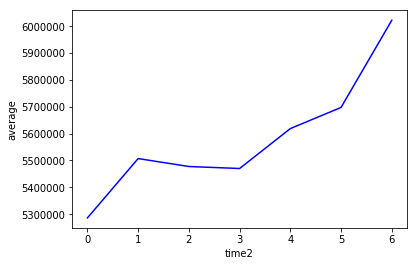

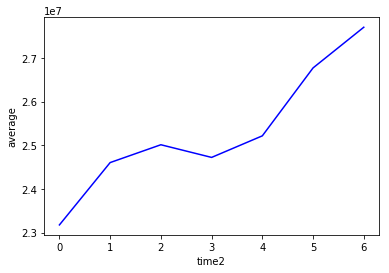

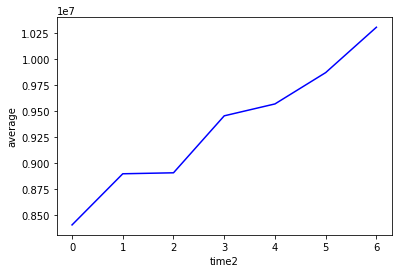

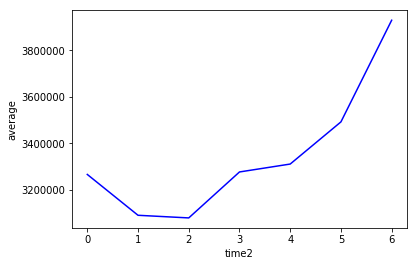

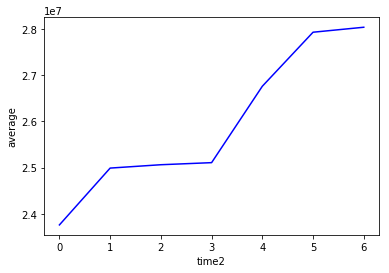

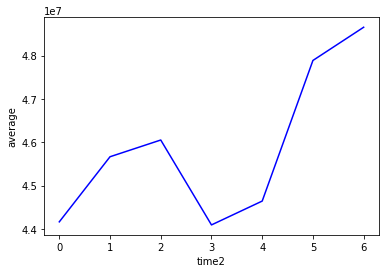

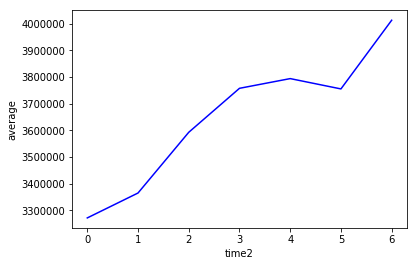

In [0]:
time3 = np.arange(0, 7).reshape(-1, 1)
rate3 = []

for i in range(len(region)):
    lr = LR()
    
    plt.figure()
    
    tmp = data3[data3['자치구'] == region[i]]
    avg = tmp['지역내총생산(당해년가격)']
    avg.fillna(0)
    
    plt.plot(time3, avg, 'b')
    lr = lr.fit(time3, avg)
    rate3.append(lr.coef_[0])
    
    plt.xlabel('time2')
    plt.ylabel('average')
    
    plt.show()

In [0]:
rate3 # 지역내 총 생산

[2436932.9285714277,
 254832.1071428571,
 35319.85714285714,
 568781.9642857142,
 146639.10714285713,
 117758.10714285712,
 359123.9285714285,
 525510.6785714285,
 175778.1785714285,
 82701.24999999999,
 232566.6071428571,
 58343.999999999985,
 682307.0714285712,
 285607.64285714284,
 991281.1071428569,
 471473.8214285713,
 130164.17857142854,
 774448.7499999998,
 97533.49999999997,
 646959.1428571427,
 297439.7142857142,
 108216.0357142857,
 729109.3928571428,
 589932.4999999998,
 114558.32142857142]

### ㅇㅇ

### 최종 정리

In [0]:
df = pd.DataFrame(data={'지역': region, '지하철 승하차 수' : rate1, '사업체 창업률': rate2, '사업체 수': rate4, '지역내총생산': rate3}, 
                  columns=['지역', '지하철 승하차 수', '사업체 창업률', '사업체 수', '지역내총생산'])
df

,지역,지하철 승하차 수,사업체 창업률,사업체 수,지역내총생산
0,강남구,294.217852,-0.104643,2650.500000,2.436933e+06
1,강동구,167.404352,-0.513929,183.142857,2.548321e+05
2,강북구,549.943577,-0.450357,-125.285714,3.531986e+04
3,강서구,199.761978,-0.211071,851.607143,5.687820e+05
4,관악구,841.459346,-0.607500,48.071429,1.466391e+05
5,광진구,308.780146,-0.542500,8.285714,1.177581e+05
6,구로구,203.953314,-0.283929,749.142857,3.591239e+05
7,금천구,313.951458,-0.398571,904.285714,5.255107e+05
8,노원구,64.436196,-0.434643,218.142857,1.757782e+05
9,도봉구,280.155087,-0.302500,157.285714,8.270125e+04


In [0]:
df.shape

(25, 5)

In [0]:
df.to_csv('/gdrive/My Drive/문화관광공모전/데이터_처리/tmp.csv', mode='w', sep=',')

### 임시

In [6]:
import pandas as pd

final = pd.read_csv("/gdrive/My Drive/문화관광공모전/데이터_처리/tt.csv")
final

,Unnamed: 0,지역,G,전입전출 기울기,문화공간수 기울기,지하철 승하차 수,사업체 창업률,사업체 수,지역내총생산
0,0,강남구,1,-54.369853,0.140476,294.217852,-0.104643,2650.500000,2.436933e+06
1,1,강동구,0,-16.650986,0.000000,167.404352,-0.513929,183.142857,2.548321e+05
2,2,강북구,0,-26.075771,0.011905,549.943577,-0.450357,-125.285714,3.531986e+04
3,3,강서구,0,-45.885413,0.021429,199.761978,-0.211071,851.607143,5.687820e+05
4,4,관악구,1,-12.093915,0.000000,841.459346,-0.607500,48.071429,1.466391e+05
5,5,광진구,0,-17.216032,-0.052381,308.780146,-0.542500,8.285714,1.177581e+05
6,6,구로구,0,-33.440567,-0.011905,203.953314,-0.283929,749.142857,3.591239e+05
7,7,금천구,0,-2.046874,0.019048,313.951458,-0.398571,904.285714,5.255107e+05
8,8,노원구,0,-43.337233,0.019048,64.436196,-0.434643,218.142857,1.757782e+05
9,9,도봉구,0,-25.946485,0.040476,280.155087,-0.302500,157.285714,8.270125e+04


In [7]:
special = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0 , 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]

final['관광특구'] = special
final

,Unnamed: 0,지역,G,전입전출 기울기,문화공간수 기울기,지하철 승하차 수,사업체 창업률,사업체 수,지역내총생산,관광특구
0,0,강남구,1,-54.369853,0.140476,294.217852,-0.104643,2650.500000,2.436933e+06,1
1,1,강동구,0,-16.650986,0.000000,167.404352,-0.513929,183.142857,2.548321e+05,0
2,2,강북구,0,-26.075771,0.011905,549.943577,-0.450357,-125.285714,3.531986e+04,0
3,3,강서구,0,-45.885413,0.021429,199.761978,-0.211071,851.607143,5.687820e+05,0
4,4,관악구,1,-12.093915,0.000000,841.459346,-0.607500,48.071429,1.466391e+05,0
5,5,광진구,0,-17.216032,-0.052381,308.780146,-0.542500,8.285714,1.177581e+05,0
6,6,구로구,0,-33.440567,-0.011905,203.953314,-0.283929,749.142857,3.591239e+05,0
7,7,금천구,0,-2.046874,0.019048,313.951458,-0.398571,904.285714,5.255107e+05,0
8,8,노원구,0,-43.337233,0.019048,64.436196,-0.434643,218.142857,1.757782e+05,0
9,9,도봉구,0,-25.946485,0.040476,280.155087,-0.302500,157.285714,8.270125e+04,0


In [11]:
len(special)

25

In [10]:
pd.concat([final['지역'], final['관광특구']], axis=1)

,지역,관광특구
0,강남구,1
1,강동구,0
2,강북구,0
3,강서구,0
4,관악구,0
5,광진구,0
6,구로구,0
7,금천구,0
8,노원구,0
9,도봉구,0


In [15]:
from sklearn.preprocessing import StandardScaler
import numpy as np

_tmp = np.array(final.iloc[:, 3:])
def z_score(data):
    mean = np.mean(data,axis=0)
    std = np.std(data,axis=0)
    return((data - mean)/ std)

_tmp = z_score(_tmp)
final.loc[:,'전입전출 기울기':'관광특구'] = _tmp
final

,Unnamed: 0,지역,G,전입전출 기울기,문화공간수 기울기,지하철 승하차 수,사업체 창업률,사업체 수,지역내총생산,관광특구
0,0,강남구,1,-2.025654,0.418297,0.381980,1.200678,3.830667,4.121323,2.291288
1,1,강동구,0,0.330637,-0.364683,-0.211449,-1.027697,-0.494979,-0.374349,-0.436436
2,2,강북구,0,-0.258128,-0.298329,1.578658,-0.681579,-1.035701,-0.826599,-0.436436
3,3,강서구,0,-1.495633,-0.245245,-0.060030,0.621223,0.676939,0.272466,-0.436436
4,4,관악구,1,0.615316,-0.364683,2.942816,-1.537151,-0.731780,-0.597253,-0.436436
5,5,광진구,0,0.295339,-0.656642,0.450124,-1.183255,-0.801530,-0.656755,-0.436436
6,6,구로구,0,-0.718205,-0.431037,-0.040417,0.224549,0.497303,-0.159482,-0.436436
7,7,금천구,0,1.242953,-0.258516,0.474324,-0.399630,0.769292,0.183317,-0.436436
8,8,노원구,0,-1.336448,-0.258516,-0.693292,-0.596022,-0.433619,-0.537220,-0.436436
9,9,도봉구,0,-0.250051,-0.139079,0.316172,0.123436,-0.540311,-0.728981,-0.436436
